# Opsin model toolkit

## Imports

In [68]:
import sys
sys.path.append('../scripts')


import numpy as np
import matplotlib.pyplot as plt
import marco_tools as mt

%matplotlib inline


## Open ABF file

-4.27246046066 1.0 pA 2.9559 1.0 s


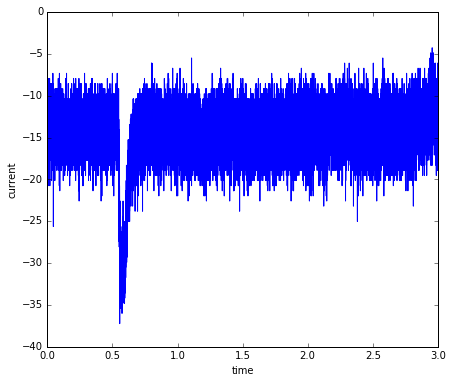

In [55]:
plt.figure(figsize=(7,6))
filename = '../experimental/abf_test/20160127_0016.abf'

# ABF file
f = mt.ABFExperimentFile(filename)
f_xdata, f_ydata = f.import_data(block=0, segment=0, signal=0)
f_xdata1, f_ydata1 = f.import_data(block=0, segment=0, signal=0)


# OpsinExperiment
e = mt.OpsinExperiment(f_ydata, xdata=f_xdata)
e1 = mt.OpsinExperiment(f_ydata1, xdata=f_xdata1, label="test")



maxcurrent = np.max(e.y)
argmaxcurrent = e.x[np.argmax(e.y)]
print maxcurrent, f_ydata.units, argmaxcurrent, f_xdata.units

plt.plot(e.x, e.y);
plt.xlabel("time")
plt.ylabel("current")

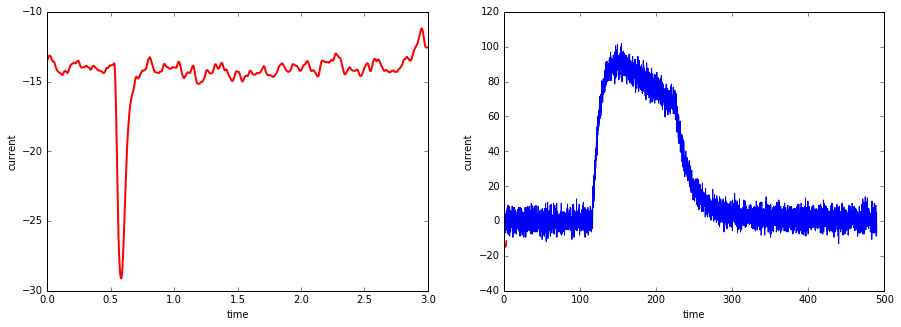

In [65]:

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
e1.smoothing(n=200)
plt.plot(e1.x, e1.y, 'r', lw=2)
plt.xlabel("time")
plt.ylabel("current")

plt.subplot(1,2,2)
plt.plot(e.x, e.y)
plt.plot(e1.x, e1.y, 'r',  lw=2);
plt.xlabel("time")
plt.ylabel("current")

## Open CSV file

cell_100_ChR2.txt


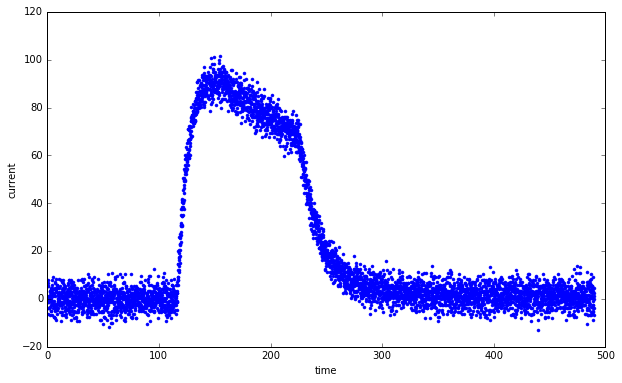

In [69]:
plt.figure(figsize=(10,6))

expFolder = mt.ExperimentFolder("../experimental/")
#print expFolder.file_names_as_string_list
filename = expFolder.file_names_as_string_list[0]
print filename

efile = mt.ExperimentFile(expFolder.folder, filename)
f_ydata = efile.column_data[0]

e = mt.OpsinExperiment(f_ydata, tstart=0, tend=500)
e.set_data_density(1, mean_between_steps=True)
e.select_by_data_points(0,-100)
e.y.invert()

plt.plot(e.x, e.y, '.')
plt.xlabel("time")
plt.ylabel("current")

In [66]:
plt.figure(figsize=(10,6))

plt.plot(e.x, e.y, '.')
fit = mt.OpsinFit(e)
fit.fit_parameter("max_current", start_fit_time=115.5, end_fit_time=115.5+4)


fit_result = fit.model("max_current")
bnd = fit.fit_bnds("max_current")
norm_param = fit.max_current

plt.plot(fit_result[0],
         fit_result[1],
         'r--',label="fit", lw=2)


plt.xlabel("time")
plt.ylabel("current")

In [67]:
plt.figure(figsize=(10,6))
plt.plot(e.x, e.y, '.')

#fit._parameters["max_current"]["popt"][0] = 300

fit.fit_parameter("tau_on", start_fit_time=115.5, end_fit_time=115.5+4)
fit.fit_parameter("tau_off", start_fit_time=227, end_fit_time=399)

plt.plot(fit.model("tau_off")[0],fit.model("tau_off")[1],'r', lw=2)
plt.plot(fit.model("tau_on")[0],fit.model("tau_on")[1],'k', label="1-exp", lw=2)

plt.plot(fit.fit_bnds("tau_off")[0],fit.fit_bnds("tau_off")[1],'ro')
plt.plot(fit.fit_bnds("tau_on")[0],fit.fit_bnds("tau_on")[1],'yo')


print "max current : ", fit.max_current
print "tau on : ", fit.tau_on
print "tau off : ", fit.tau_off

plt.xlabel("time")
plt.ylabel("current")

plt.show;

max current :  173.511412279
tau on :  24.8955550792
tau off :  22.4447459039
